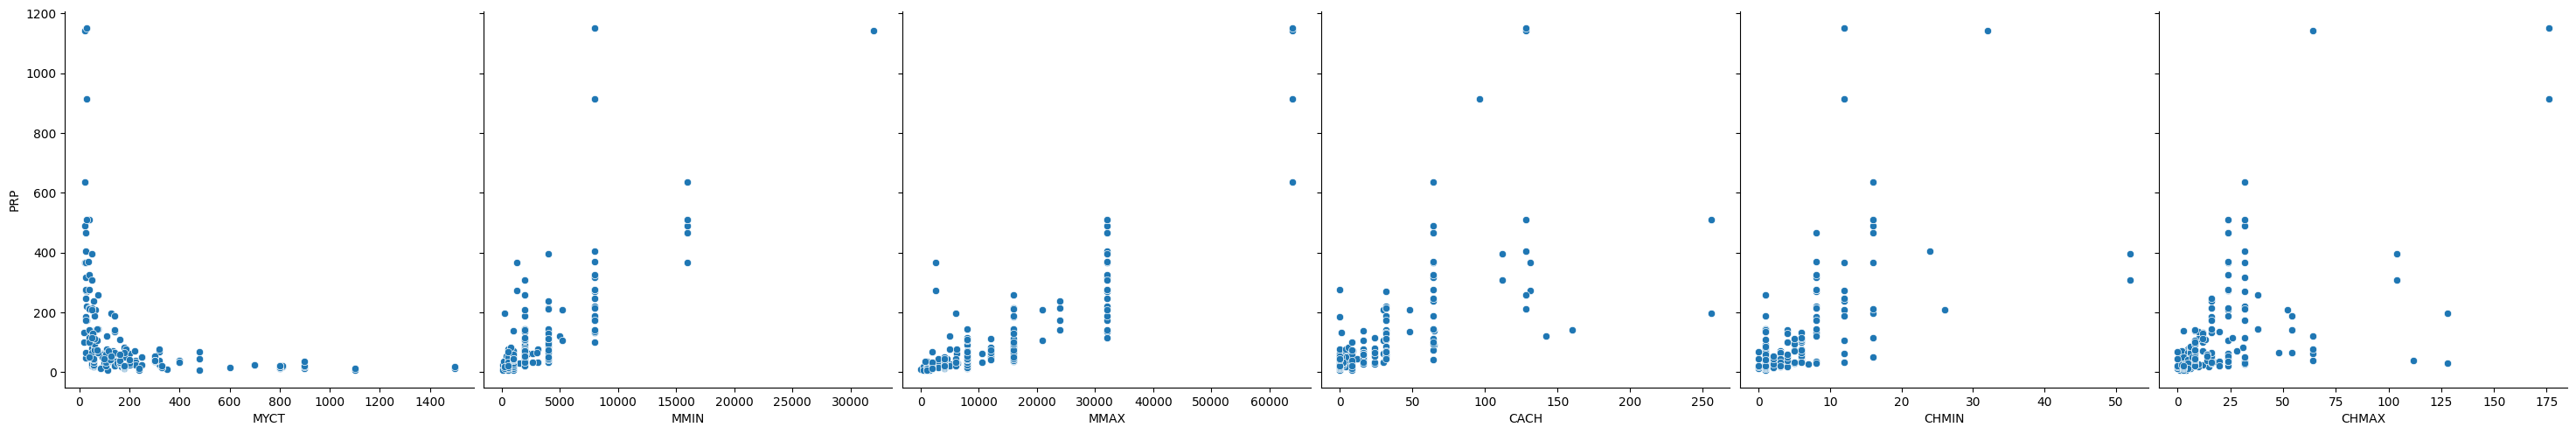

Best alpha: 10
Train MSE: 919.3062895010623
Train MAE: 19.89487584810844
Train R²: 0.9521803619049267
Cross-Validation Mean R²: 0.7028674582964964
Test MSE: 6431.56105684578
Test MAE: 39.27950940693818
Test R²: 0.8736602116263905


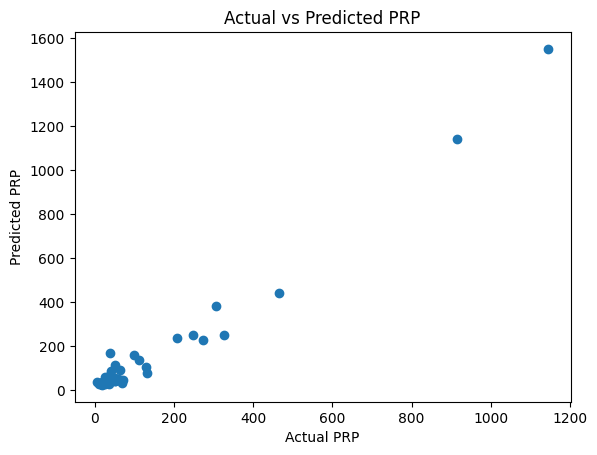

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터와 데이터셋 불러오기
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data"
names = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
data = pd.read_csv(url, names=names)

#  변수 선택
features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
target = "PRP"
X = data[features]
y = data[target]

#    데이터 탐색 및 시각화
sns.pairplot(data, x_vars=features, y_vars=target, height=5)
plt.show()

#      데이터 전처리하기
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할하기(훈련과 테스트로)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#         모델 학습
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_poly, y_train)

best_model = grid_search.best_estimator_

# 학습 데이터 성능평가
y_train_pred = best_model.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
cv_scores = cross_val_score(best_model, X_train_poly, y_train, cv=5, scoring='r2')
cv_r2 = np.mean(cv_scores)

# 테스트 데이터 성능 평가
y_test_pred = best_model.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

#   출력
print("Best alpha:", grid_search.best_params_['alpha'])
print("Train MSE:", train_mse)
print("Train MAE:", train_mae)
print("Train R²:", train_r2)
print("Cross-Validation Mean R²:", cv_r2)
print("Test MSE:", test_mse)
print("Test MAE:", test_mae)
print("Test R²:", test_r2)

#   모델 시각화 
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Actual vs Predicted PRP")
plt.show()